## setting up a common path to directory 

In [1]:
path = r'D:\Projects\eyewear_classification'

# Importing Packages

In [104]:
# For loading/processing the images
import keras
import tensorflow
import sklearn
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# Models
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import OneClassSVM

# Clustering, Dimension reduction and confusion matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# others
import os
import urllib.request
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import pickle

# Data Cleaning and Processing

## Checking for null values

In [3]:
# Loading data set and checking for null values 
df = pd.read_csv(path+'\eyewear_ml_challenge.csv')
df.isnull().values.any()

False

In [4]:
df

,Unnamed: 0,product_name,product_id,parent_category,Image_Front,frame_shape
0,0,Vintage Persona C4,7641,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
1,1,Vintage Crazy-X C2 Red,7643,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
2,2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
3,3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
4,4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
...,...,...,...,...,...,...
5564,5565,Black White Full Rim Rectangle Vincent Chase O...,99444,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5565,5566,Maroon Full Rim Rectangle Vincent Chase Online...,99445,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5566,5567,Todaywear TOI Special: Black Blue Full Rim Rec...,99446,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5567,5568,Tortoise Full Rim Rectangle Vincent Chase Onli...,99447,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle


## Feature Extraction 

In [5]:
# vgg16 is a model based on CNN, here we removed the final output layer from the model to retrive features from image dataset.
vgg_model = VGG16()
vgg_model = Model(inputs = vgg_model.inputs, outputs = vgg_model.layers[-2].output)

In [6]:
# This dataframe contains the url for images.
eyewears = df['Image_Front']

In [7]:
# following function is defined to return features using VGG16() model. It takes image url and VGG model as input.
# VGG16() model takes input of images with size 224x224
def extract_features(im,model):
    # loading the image from url
    urllib.request.urlretrieve(im,'img')
    img = Image.open("img")
    # loading the image as 224x224 array
    img = img.resize((224,224))
    # converting to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features

### The following step iterates over url(s) of images to extract features from it. As there is a large data set, this step may take some time to execute. Also, images are not stored on developer's local machine and are loaded directly from the url(s). Thus, time taken for this step would depend on one's internet connection also. So, I have commented the actual code for processing the data, and instead have loaded pickle files of extracted features directly, so as to save time for anyone who executes following cell
### Please note: We are using this step, when we are processing on data to make the model, and while making final predictions we do not need to process over each of data set and hence prediction time would not be much!! 

In [8]:
"""
# count to track index while iterating over eyewears dataframe.
count = 2
# making an empty dict to store image urls with their features
data = {}
# ind dataframe would contain index for the eyewear where we find some exeption in extracting features
#ind = pd.DataFrame(columns=['Sr No']);
ind = []
for eyewear in eyewears:
    try:
        feat = extract_features(eyewear,vgg_model)
        data[eyewear] = feat
    except:
        with open(path+r'\dumpl_files.pkl','wb') as file:
            pickle.dump(data,file)
            #ind = ind.append({'Sr No': count}, ignore_index=True)
            ind.append(count)
    count = count+1
    
with open(path+r'\ind.pkl','wb') as f:
    pickle.dump(ind,f)
    
pickle_out = open(path+r'\data.pickle','wb')
pickle.dump(data,pickle_out)
pickle_out.close

"""
pickle_in = open(path+r'\data.pickle','rb')
data = pickle.load(pickle_in)

with open(path+r'\ind.pickle', 'rb') as f:
    ind = pickle.load(f)



"\npickle_in = open(path+r'\\data.pickle','rb')\ndata = pickle.load(pickle_in)\n\nwith open(path+r'\\ind.pickle', 'rb') as f:\n    ind = pickle.load(f)\n\n"

In [12]:
# There were some corrupt url(s) encountered while extracting features. 'ind' dataframe contains index for such url(s).
# We need to remove those url(s) from our dataset
df = pd.read_csv('eyewear_ml_challenge.csv', skiprows = ind)
# dropping unnecessary columns
df = df[['product_name','product_id','parent_category','Image_Front','frame_shape']]
eyewears = df["Image_Front"]
# Pickeling the df dataframe
pd.to_pickle(df,path+r'\df.pkl')

In [15]:
# after dropping corrupted files we have dataset of 5534 eyewears
df

,product_name,product_id,parent_category,Image_Front,frame_shape
0,Vintage Persona C4,7641,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
1,Vintage Crazy-X C2 Red,7643,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
...,...,...,...,...,...
5529,Black White Full Rim Rectangle Vincent Chase O...,99444,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5530,Maroon Full Rim Rectangle Vincent Chase Online...,99445,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5531,Todaywear TOI Special: Black Blue Full Rim Rec...,99446,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5532,Tortoise Full Rim Rectangle Vincent Chase Onli...,99447,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle


In [18]:
# filenames would contain the url(s) of images
filenames = np.array(list(data.keys()))
# feat would the extracted features for every image in the form of numpy array. It would be a 5393x1x4096 array
feat = np.array(list(data.values()))
# reshaping feat to 5393x4096 2-D array, so that it contains feature for every image in consecutive rows
feat = feat.reshape(-1,4096)
np.save(path+r'\feat.npy',feat)
np.save(path+r'\filenames.npy',filenames)

In [21]:
# working with 4096 features for every image is computationally expensive, so we apply dimension reduction on out features to 
# generate 100 features from every image.
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)
np.save(path+r'\x.npy',x)

#### Now, as we have extracted features from each image, we can start applying common ML algorithms on data.

# Testing Algorithm: For Task-1

In [140]:
ocsvm = OneClassSVM(nu=0.05,gamma = 0.25)
ocsvm.fit(x)

OneClassSVM(gamma=0.25, nu=0.05)

In [141]:
a = ocsvm.predict(x)


In [143]:
bs = filenames[np.where(a==1)]
bs.shape

(3635,)

In [139]:
count = 0
for i in list(range(235)):
    urllib.request.urlretrieve(bs[count],"img")
    img = Image.open("img")
    img.show()
    count = count+1

KeyboardInterrupt: 

### For Task-1, I would be using unsupervised machine learning techniques to classify similar images together. I will first extract the features from the image provided by user. Now, I will add this image feature into the features array of given dataset. Then, I will use K-Means method on the features array to make clusters of different datasets. Then, I will identify the cluster containing the image provided by the user. Finally, I will display the 10 images whose feature vectors have smallest euclidean distance from the feature vector for image provided by user.

## K-Means clustering on extracted features 

Text(0, 0.5, 'Sum of squared distance')

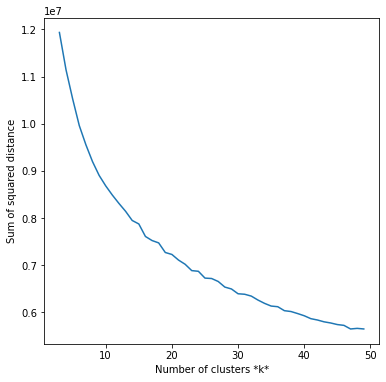

In [23]:
# this is to see which value for k might be the best 
# sse would contain sum of squared distances
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

#### From above figure, we can see that the 'elbow' of curve is observed around k=16. So, we will make 16 clusters in K-Means algorithm.

In [90]:
kmeans = KMeans(n_clusters=16, random_state=22)
kmeans.fit(x)
groups = {}
count = -1
# grouping the images belonging to same cluster
for file, cluster in zip(filenames,kmeans.labels_):
    count = count+1
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [81]:
# Following func would return 10 images from any of the cluster. It would take cluster number as input
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 10 images to be shown at a time
    if len(files) > 10:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        urllib.request.urlretrieve(file,'img')
        img = Image.open("img")
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 530 to 10


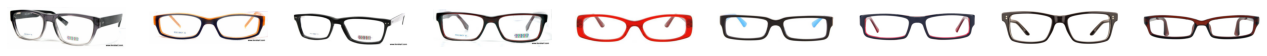

In [82]:
# enter any cluster number from 0 to 15 in the following function
view_cluster(1)

## Finding Ten Nearest Neighbors for a test sample from its cluster

In [89]:
eyewears[3516]

'http://tak-apps-dev.s3.amazonaws.com/recruitment/machine-learning/dataset/lux-ray-ban-rb3342i-004-58-size-63-gunmetal-004-58-way-sun_j_5800_1.jpg'

In [83]:
# enter any value between 0 to 5392, eyewears[j] would be used as test sample and we will try to predict 10 most similar images
j = 3516

(-0.5, 1324.5, 635.5, -0.5)

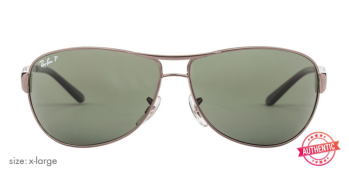

In [84]:
# Here we extract features from our test image i.e eyewears[j]
test_feature = extract_features(eyewears[j],vgg_model)
test_feature = pca.transform(test_feature)
# loading and showing test image
urllib.request.urlretrieve(eyewears[j],'img')
img = Image.open("img")
plt.imshow(img)
plt.axis('off')

In [85]:
# extracting features all members of the cluster to which our sample belongs
clust_ind = kmeans.labels_[j]
#cluster_x = x[np.where(kmeans.labels_== clust_ind)]

In [86]:
cluster_x = x[np.where(kmeans.labels_== clust_ind)]

In [87]:
# calculating eucilidian distance between feature vector of our sample and every member of it's cluster
distances = np.linalg.norm(cluster_x - test_feature, axis=1)
k = 11
# ids contains the index of 11 closest members of the cluster to the test image
ids = distances.argsort()[:k]

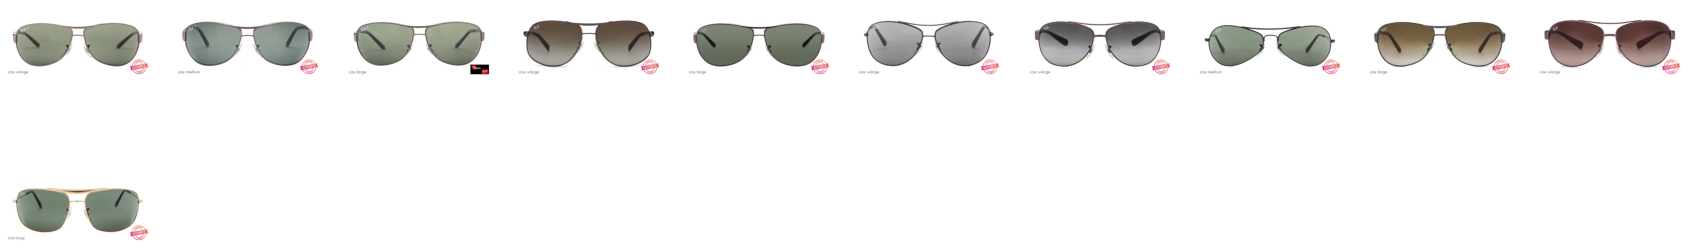

In [88]:
# we iterate over ids to show the images of 10 closet eyeewears to our test eyewear. We ignore ids[0] as it would be the test
# eyewear itself.
plt.figure(figsize = (30,30))
count = 0
for i in ids:
    #if(i==ids[0]):
        #continue
    count = count+1
    plt.subplot(10,10,count)
    urllib.request.urlretrieve(groups[clust_ind][i],'img')
    img = Image.open("img")
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')

In [96]:
mat = []
for i in ids:
    mat.append(groups[clust_ind][i])

In [102]:
type(filenames)

numpy.ndarray

# Testing Algorithms for Task-2 

### For Task-2, I would be using supervised multi-class classification algorithms over the extracted features from the provided dataset. I would be making two different classification models to predic eyewear type and eyewear shape. I will try Logistic Regression and Support Vector Machine algorithms to train my model over the extracted features, and finaly the algorithm with better accuracy would be used for making final model.

## Splitting Data 

In [39]:
# Setting feature and target matrices
X = pd.DataFrame(x)
y1 = df['parent_category']
y2 = df['frame_shape']

In [40]:
# Two different splits are made here. These different splits would be used for making two different supervised classification
# models to predic eyewear type and eyewear shape.
# Training data is 60% of total data
# Cross validation data is 20% of total data
# Test data is 20%  of total data
X_train1, X_temp_test1, y_train1, y_temp_test1 = train_test_split(X,y1, test_size = 0.4)
X_validation1, X_test1, y_validation1, y_test1 = train_test_split(X_temp_test1,y_temp_test1, test_size = 0.5)

X_train2, X_temp_test2, y_train2, y_temp_test2 = train_test_split(X,y2, test_size = 0.4)
X_validation2, X_test2, y_validation2, y_test2 = train_test_split(X_temp_test2,y_temp_test2, test_size = 0.5)

In [41]:
# Following shows the dataset counts for Train,validation and Test data. We are using 100 features to make our model
print(f"Train dataset      :{X_train1.shape}")
print(f"validation dataset :{X_validation1.shape}")
print(f"Test dataset       :{X_test1.shape}")

Train dataset      :(3320, 100)
validation dataset :(1107, 100)
Test dataset       :(1107, 100)


# Multiclass Logistic Regression on extracted features 

### Tuning regularization parameter

### In this step, I iterated over different value of regularisation parameter(C) and calculated train cost(error) and validation cost. The value of 'C' for which minimum validation error was observed was used.

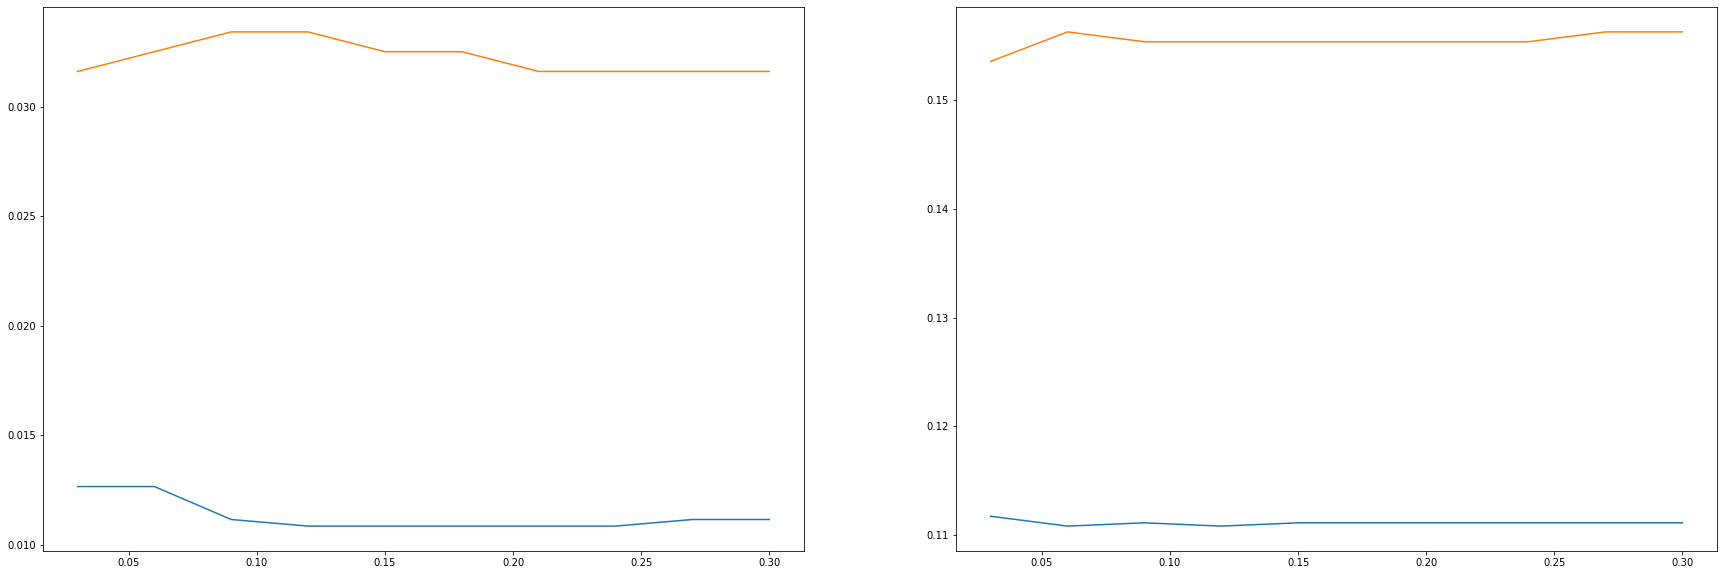

In [44]:
arr = [1,2,3,4,5,6,7,8,9,10]
t_err1 = []
v_err1 = []
t_err2 = []
v_err2 = []
m1 = 0.03
m2 = 0.03
for i in arr:
    model1 = LogisticRegression(C=(m1*i),max_iter=10000,multi_class='auto')
    model2 = LogisticRegression(C=(m2*i),max_iter=10000,multi_class='auto')
    model1.fit(X_train1,y_train1)
    model2.fit(X_train2,y_train2)
    t_err1.append(1 - model1.score(X_train1,y_train1))
    v_err1.append(1 - model1.score(X_validation1,y_validation1))
    t_err2.append(1 - model2.score(X_train2,y_train2))
    v_err2.append(1 - model2.score(X_validation2,y_validation2))
arr1 = [i*m1 for i in arr]
arr2 = [i*m2 for i in arr]
plt.figure(figsize = (30,10));
plt.subplot(1,2,1)
plt.plot(arr1,t_err1)
plt.plot(arr1,v_err1)
plt.subplot(1,2,2)
plt.plot(arr2,t_err2)
plt.plot(arr2,v_err2)

### Learning curves

###  Learning curves were plotted to check for underfitting or overfitting

[learning_curve] Training set sizes: [3486 3548 3610 3672 3735 3797 3859 3921 3983 4046 4108 4170 4233 4295
 4357 4419 4482 4544 4606 4668 4731 4793 4855 4917 4980]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.1s finished


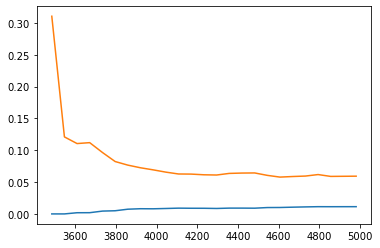

In [45]:
# Getting train and test scores from learning_curve function
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(),X,y1,cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.7,1,25), verbose=1)
train_cost = np.mean(1-train_scores,axis=1)
test_cost = np.mean(1-test_scores,axis=1)
# # ploting learning curve for logistic model predicting type of eyewear
plt.plot(train_sizes,train_cost)
plt.plot(train_sizes,test_cost)

###  The above curve is for logistic regression model predicting type of the eyewear. It looks good, as now, a further increase in training data would not have much effect on training and validation costs. For final training set, cost is low which tells us about the good accuracy of our model.  Also, the validation cost curve is parallel to training cost curve and have small distance between them, it tells us that our model does not have high variance, while a significant dip in validation cost tells us that our model does not have high bias.

[learning_curve] Training set sizes: [  49  150  251  351  452  552  653  754  854  955 1055 1156 1257 1357
 1458 1559 1659 1760 1860 1961 2062 2162 2263 2363 2464 2565 2665 2766
 2867 2967 3068 3168 3269 3370 3470 3571 3671 3772 3873 3973 4074 4175
 4275 4376 4476 4577 4678 4778 4879 4980]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   27.3s finished


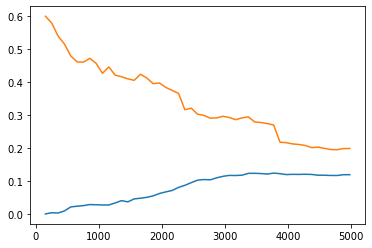

In [46]:
# Getting train and test scores from learning_curve function
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(C=0.21,multi_class='auto'),X,y2,cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)
train_cost = np.mean(1-train_scores,axis=1)
test_cost = np.mean(1-test_scores,axis=1)
# ploting learning curve for logistic model predicting shape of eyewear
plt.plot(train_sizes,train_cost)
plt.plot(train_sizes,test_cost)

### The above curve is for logistic model predicting shape of eyewear. It looks good, as now the increase in training set does not affect the training and validation costs. The value of validation cost and training cost are slightly higher then our previous model. It means, logistic model predicting type of eyewear have higher accuracy then the logistic model predicting shape of eyewear. Also, the validation cost curve is parallel to training cost curve and have small distance between them, it tells us that our model does not have high variance, while a slow and significant dip in validation cost tells us that our model does have high bias.

In [47]:
# Defining logistic models
logistic_model1 = LogisticRegression(C=0.18,max_iter=10000,multi_class='auto')
logistic_model2 = LogisticRegression(C=0.21,max_iter=10000,multi_class='auto')

In [48]:
# Fitting model over train data
logistic_model1.fit(X_train1,y_train1)
logistic_model2.fit(X_train2,y_train2)

LogisticRegression(C=0.21, max_iter=10000)

In [49]:
# Accuracy for logistic model predicting type of eyewear
logistic_model1.score(X_test1, y_test1)

0.973803071364047

In [50]:
# Accuracy for logistic model predicting shape of eyewear
logistic_model2.score(X_test2,y_test2)

0.8681120144534779

In [51]:
# Calculating predictions for test set
y_predicted1 = logistic_model1.predict(X_test1)
y_predicted2 = logistic_model2.predict(X_test2)

array([[308,   6,   0],
       [ 16, 414,   0],
       [  2,   5, 356]], dtype=int64)

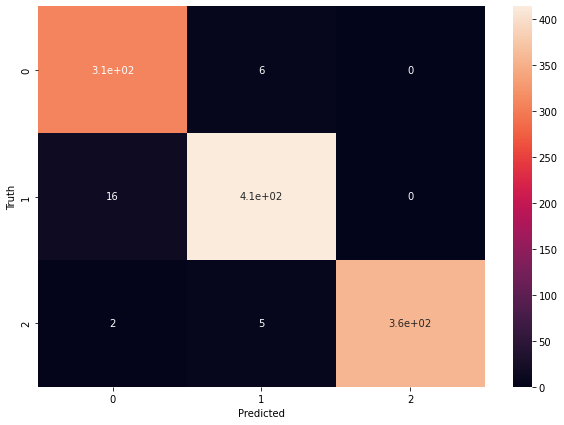

In [52]:
# Calulating Confusion matrix for logistic model predicting type of eyewear
cm1 = confusion_matrix(y_test1,y_predicted1)
plt.figure(figsize=(10,7))
sn.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
cm1

array([[190,   4,  11,   0],
       [ 20,  46,  26,   9],
       [  9,  12, 627,  21],
       [  4,   3,  27,  98]], dtype=int64)

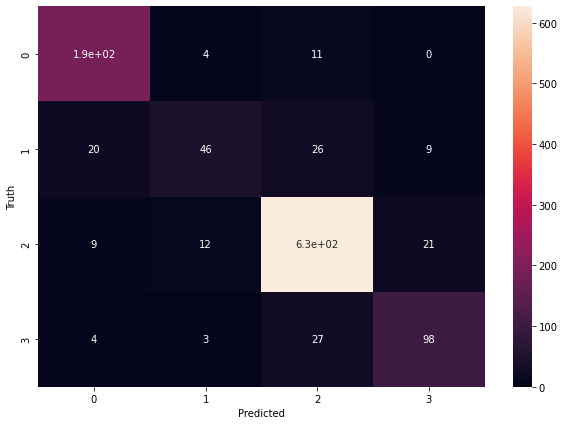

In [53]:
# Calulating Confusion matrix for logistic model predicting shape of eyewear
cm2 = confusion_matrix(y_test2,y_predicted2)
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
cm2

In [54]:
# enter any value between 0 to 5392, eyewears[j] would be used as test sample and we will try to predict 10 most similar images
j = 4327

(-0.5, 999.5, 427.5, -0.5)

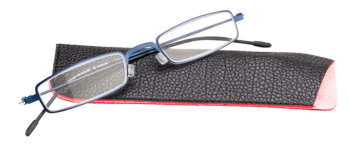

In [55]:
# Here we extract features from our test image i.e eyewears[j]
test_feature = extract_features(eyewears[j],vgg_model)
test_feature = pca.transform(test_feature)
# loading and showing test image
urllib.request.urlretrieve(eyewears[j],'img')
img = Image.open("img")
plt.imshow(img)
plt.axis('off')

In [56]:
# our prediction of type for a given test sample
logistic_model1.predict(test_feature)

array(['Non-Power Reading'], dtype=object)

In [57]:
# our prediction of shape for a given test sample
logistic_model2.predict(test_feature)

array(['Rectangle'], dtype=object)

In [58]:
# Actual type and shape for the given test sample
df.iloc[j]

product_name       Mexican Readers 006 Blue Reading Eyeglasses (O...
product_id                                                     91049
parent_category                                    Non-Power Reading
Image_Front        http://tak-apps-dev.s3.amazonaws.com/recruitme...
frame_shape                                                Rectangle
Name: 4327, dtype: object

# Multiclass SVM on extracted features 

### Tuning regularization parameter

### In this step, I iterated over different value of regularisation parameter(C) and calculated train cost(error) and validation cost. The value of 'C' for which minimum validation error was observed was used.

1 0.15537488708220415
2 0.1589882565492322
3 0.16079494128274618
4 0.1635049683830172
5 0.1635049683830172
6 0.16440831074977413
7 0.16531165311653118
8 0.16531165311653118
9 0.16531165311653118
10 0.16260162601626016


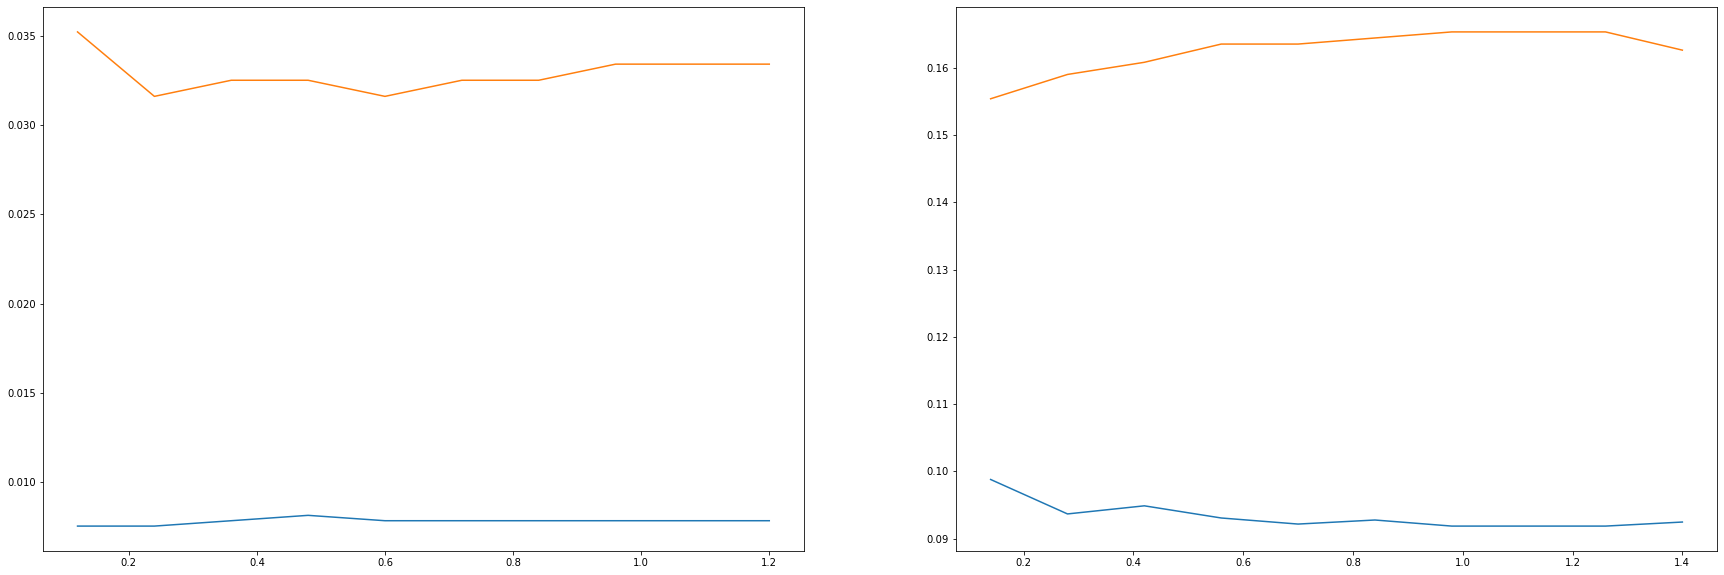

In [59]:
arr = [1,2,3,4,5,6,7,8,9,10]
t_err1 = []
v_err1 = []
t_err2 = []
v_err2 = []
m1 = 0.12
m2 = 0.14
for i in arr:
    model1 = svm.SVC(C=(m1*i),kernel='linear')
    model2 = svm.SVC(C=(m2*i),kernel='linear')
    model1.fit(X_train1,y_train1)
    model2.fit(X_train2,y_train2)
    t_err1.append(1 - model1.score(X_train1,y_train1))
    v_err1.append(1 - model1.score(X_validation1,y_validation1))
    t_err2.append(1 - model2.score(X_train2,y_train2))
    v_err2.append(1 - model2.score(X_validation2,y_validation2))
    print(i, v_err2[i-1])
arr1 = [i*m1 for i in arr]
arr2 = [i*m2 for i in arr]
plt.figure(figsize = (30,10));
plt.subplot(1,2,1)
plt.plot(arr1,t_err1)
plt.plot(arr1,v_err1)
plt.subplot(1,2,2)
plt.plot(arr2,t_err2)
plt.plot(arr2,v_err2)

[learning_curve] Training set sizes: [3486 3548 3610 3672 3735 3797 3859 3921 3983 4046 4108 4170 4233 4295
 4357 4419 4482 4544 4606 4668 4731 4793 4855 4917 4980]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.5min finished


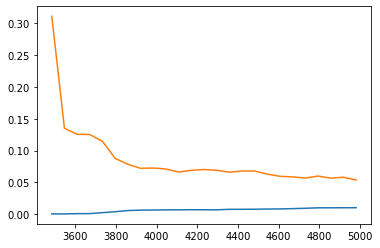

In [60]:
# Getting train and test scores from learning_curve function
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C=1,kernel='linear'),X,y1,cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.7,1,25), verbose=1)
train_cost = np.mean(1-train_scores,axis=1)
test_cost = np.mean(1-test_scores,axis=1)
# ploting learning curve for SVM model predicting type of eyewear
plt.plot(train_sizes,train_cost)
plt.plot(train_sizes,test_cost)

### The above curve is for SVM model predicting type of the eyewear. It looks good, as now, a further increase in training data would not have much effect on training and validation costs. For final training set, cost is low which tells us about the good accuracy of our model.  Also, the validation cost curve is parallel to training cost curve and have small distance between them, it tells us that our model does not have high variance, while a significant dip in validation cost tells us that our model does not have high bias. 

[learning_curve] Training set sizes: [  49  597 1145 1693 2241 2788 3336 3884 4432 4980]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.3min finished


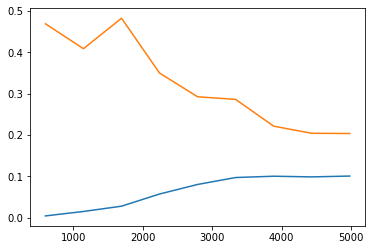

In [61]:
# Getting train and test scores from learning_curve function
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C=1.12,kernel='linear'),X,y2,cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,10), verbose=1)
train_cost = np.mean(1-train_scores,axis=1)
test_cost = np.mean(1-test_scores,axis=1)
# ploting learning curve for SVM model predicting shape of eyewear
plt.plot(train_sizes,train_cost)
plt.plot(train_sizes,test_cost)

### The above curve is for SVM model predicting shape of eyewear. It looks good, as now the increase in training set does not affect the training and validation costs. The value of validation cost and training cost are slightly higher then our previous model. It means, SVM model predicting type of eyewear have higher accuracy then the SVM model predicting shape of eyewear. Also, the validation cost curve is parallel to training cost curve and have small distance between them, it tells us that our model does not have high variance, while a slow and significant dip in validation cost tells us that our model does have high bias.

In [62]:
# Defining SVM models
svm_model1 = svm.SVC(C=1,kernel='linear')
svm_model2 = svm.SVC(C=1.12,kernel='linear')

In [63]:
# Fitting model over train data
svm_model1.fit(X_train1,y_train1)
svm_model2.fit(X_train2,y_train2)

SVC(C=1.12, kernel='linear')

In [64]:
# Accuracy for SVM model predicting type of eyewear
svm_model1.score(X_test1, y_test1)

0.974706413730804

In [65]:
# Accuracy for SVM model predicting shape of eyewear
svm_model2.score(X_test2, y_test2)

0.8545618789521229

In [66]:
# Calculating predictions for test set
y_predicted1 = svm_model1.predict(X_test1)
y_predicted2 = svm_model2.predict(X_test2)

array([[311,   3,   0],
       [ 15, 414,   1],
       [  3,   6, 354]], dtype=int64)

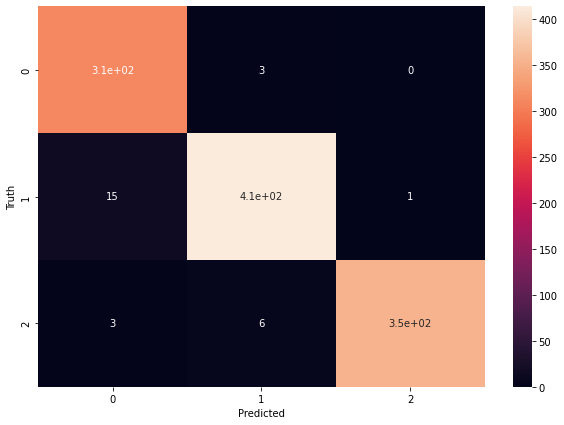

In [67]:
# Calulating Confusion matrix for SVM model predicting type of eyewear
cm1 = confusion_matrix(y_test1,y_predicted1)
plt.figure(figsize=(10,7))
sn.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
cm1

array([[186,   9,   9,   1],
       [ 22,  50,  25,   4],
       [  9,  15, 624,  21],
       [  5,  12,  29,  86]], dtype=int64)

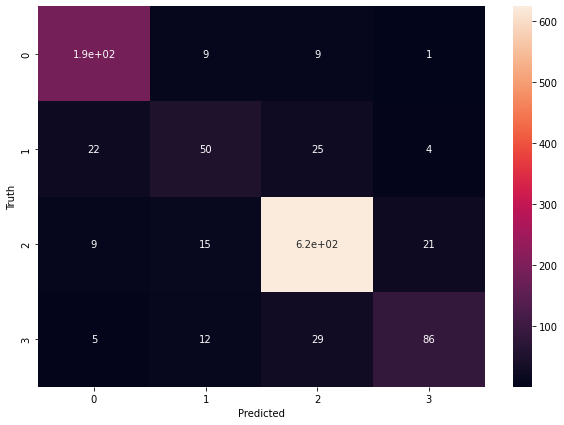

In [68]:
# Calulating Confusion matrix for SVM model predicting shape of eyewear
cm2 = confusion_matrix(y_test2,y_predicted2)
plt.figure(figsize=(10,7))
sn.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
cm2

In [69]:
# enter any value between 0 to 5392, eyewears[j] would be used as test sample and we will try to predict 10 most similar images
j = 2722

(-0.5, 999.5, 365.5, -0.5)

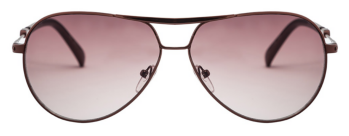

In [70]:
# Here we extract features from our test image i.e eyewears[j]
test_feature = extract_features(eyewears[j],vgg_model)
test_feature = pca.transform(test_feature)
# loading and showing test image
urllib.request.urlretrieve(eyewears[j],'img')
img = Image.open("img")
plt.imshow(img)
plt.axis('off')

In [71]:
# our prediction of type for a given test sample
svm_model1.predict(test_feature)

array(['sunglasses'], dtype=object)

In [72]:
# our prediction of shape for a given test sample
svm_model2.predict(test_feature)

array(['Aviator'], dtype=object)

In [73]:
# Actual type and shape for the given test sample
df.iloc[j]

product_name       Copper Grey Gradient Full Rim Aviator Shape La...
product_id                                                     29665
parent_category                                           sunglasses
Image_Front        http://tak-apps-dev.s3.amazonaws.com/recruitme...
frame_shape                                                  Aviator
Name: 2722, dtype: object

### On comparing logistic and SVM model, we can see, SVM has better accuracy for predicting both type and shape of eyewears. Hence, we will use SVM model for making predictions for Task-2.

# Saving our trained models 

In [74]:
kmeans =  KMeans(n_clusters=16, random_state=22)

In [75]:
vgg_model.save(path+r'\vgg_model.h5')
pickle.dump(logistic_model1, open(path+r'\logistic_model1.sav', 'wb'))
pickle.dump(logistic_model2, open(path+r'\logistic_model2.sav', 'wb'))
pickle.dump(svm_model1, open(path+r'\svm_model1.sav', 'wb'))
pickle.dump(svm_model2, open(path+r'\svm_model2.sav', 'wb'))
pickle.dump(pca,open(path+r'\pca.sav','wb'))
pickle.dump(kmeans,open(path+r'\kmeans.sav','wb'))

# END